In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import io
import re
import matplotlib.lines as lines

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
filename = "/content/base_jerry.xlsx"
tabla = pd.read_excel( filename)
tabla.head()

,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,100,100,65,89,65,95,65,92,58.0,86,363,99
1,100,100,100,100,73,99,76,100,80.0,100,433,100
2,100,100,72,97,64,93,67,94,69.0,95,376,100
3,100,100,74,99,70,98,71,98,56.0,83,385,100
4,100,100,76,99,77,100,70,97,69.0,95,399,100


In [ ]:
X, Y, Z = tabla["PERCENTIL_GLOBAL"], tabla["PUNT_LECTURA_CRITICA"], tabla["PUNT_MATEMATICAS"]  # La variable regresora, la variable respuesta
print(X.head(3))
print(Y.head(3))
print(Z.head(3))

0     99
1    100
2    100
Name: PERCENTIL_GLOBAL, dtype: int64
0    100
1    100
2    100
Name: PUNT_LECTURA_CRITICA, dtype: int64
0     65
1    100
2     72
Name: PUNT_MATEMATICAS, dtype: int64


In [ ]:
sin_atipicos = tabla[(tabla["PERCENTIL_GLOBAL"] < 6000) & (tabla["PUNT_LECTURA_CRITICA"] < 800)]
print(sin_atipicos.head())
tabla1 = pd.concat([sin_atipicos["PERCENTIL_GLOBAL"], sin_atipicos["PUNT_LECTURA_CRITICA"],  sin_atipicos["PUNT_MATEMATICAS"]], axis = 1)
print(tabla1.head())

   PUNT_LECTURA_CRITICA  PERCENTIL_LECTURA_CRITICA  PUNT_MATEMATICAS  \
0                   100                        100                65   
1                   100                        100               100   
2                   100                        100                72   
3                   100                        100                74   
4                   100                        100                76   

   PERCENTIL_MATEMATICAS  PUNT_C_NATURALES  PERCENTIL_C_NATURALES  \
0                     89                65                     95   
1                    100                73                     99   
2                     97                64                     93   
3                     99                70                     98   
4                     99                77                    100   

   PUNT_SOCIALES_CIUDADANAS  PERCENTIL_SOCIALES_CIUDADANAS  PUNT_INGLES  \
0                        65                             92         58.0   
1 

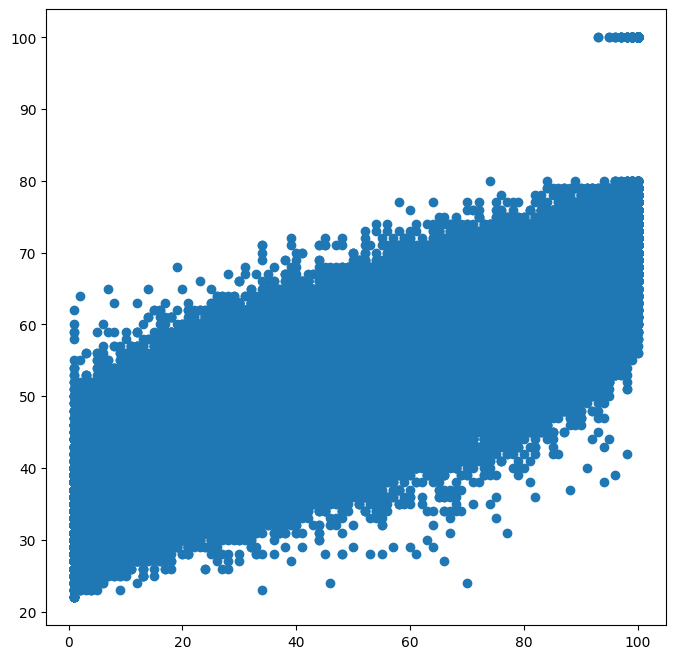

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(tabla1["PERCENTIL_GLOBAL"], tabla1["PUNT_LECTURA_CRITICA"])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split # Acá vamos a seleccionar los datos de entrenamiento y de prueba
x_train, x_test, y_train, y_test, z_train, z_test= train_test_split(tabla1["PERCENTIL_GLOBAL"], tabla1["PUNT_LECTURA_CRITICA"], tabla1["PUNT_MATEMATICAS"], test_size = 0.3)
 # Escogemos el 30% de los datos para prueba
print(x_train, y_train, z_train)
yz_train = pd.concat([y_train, z_train], axis=1)
print(yz_train)
yz_test = pd.concat([y_test, z_test], axis=1)

81100     79
167226    77
169732    83
98554     74
347648    14
          ..
102091    94
411571    30
441517    40
412331    17
257818    61
Name: PERCENTIL_GLOBAL, Length: 340865, dtype: int64 81100     62
167226    57
169732    56
98554     61
347648    46
          ..
102091    61
411571    41
441517    38
412331    41
257818    51
Name: PUNT_LECTURA_CRITICA, Length: 340865, dtype: int64 81100     65
167226    59
169732    58
98554     46
347648    40
          ..
102091    68
411571    48
441517    58
412331    33
257818    58
Name: PUNT_MATEMATICAS, Length: 340865, dtype: int64
        PUNT_LECTURA_CRITICA  PUNT_MATEMATICAS
81100                     62                65
167226                    57                59
169732                    56                58
98554                     61                46
347648                    46                40
...                      ...               ...
102091                    61                68
411571                    41    

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(yz_train, x_train)

LinearRegression()

In [ ]:
print("El intercepto del modelo es: ", modelo.intercept_)
print("Coeficiente:", list(zip(yz_train, modelo.coef_.flatten(), )))

El intercepto del modelo es:  -91.47413820262238
Coeficiente: [('PUNT_LECTURA_CRITICA', 1.5326078847592428), ('PUNT_MATEMATICAS', 1.206873431214113)]


In [ ]:
print("Coeficiente de determinación R^2:", modelo.score(yz_test, x_test))

Coeficiente de determinación R^2: 0.8888519301750492


In [ ]:
from sklearn.metrics import mean_squared_error
predicciones = modelo.predict(yz_test)
print(predicciones)
rmse = mean_squared_error(y_true  = x_test, y_pred  = predicciones, squared = True)
print("El cuadrado medio del error es: ", rmse)

[15.4616975  64.54269112 53.48870147 ... 27.30076174 24.46521605
 55.25097943]
El cuadrado medio del error es:  93.17535278868068


In [ ]:
modelo.predict(yz_train)

array([81.99432368, 67.09004367, 64.35056235, ..., 36.76362043,
       11.1896083 , 56.68752293])

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = tabla1[["PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS"]]
Y = tabla1["PERCENTIL_GLOBAL"]
X_train, X_test, Y_train, Y_test = train_test_split(
                                        X,
                                        Y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [ ]:
modelo1 = sm.OLS(endog=Y_train, exog=X_train, dummy_endog=True)
modelo1 = modelo1.fit()
print(modelo1.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                          1.487e+06
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                        0.00
Time:                        22:10:51   Log-Likelihood:                     -1.7124e+06
No. Observations:              389560   AIC:                                  3.425e+06
Df Residuals:                  389558   BIC:                                  3.425e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['dummy_endog']
  warnings.warn(msg, ValueWarning)


In [ ]:
intervalos_ci = modelo1.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
PUNT_LECTURA_CRITICA,0.242074,0.256398
PUNT_MATEMATICAS,0.779340,0.793883


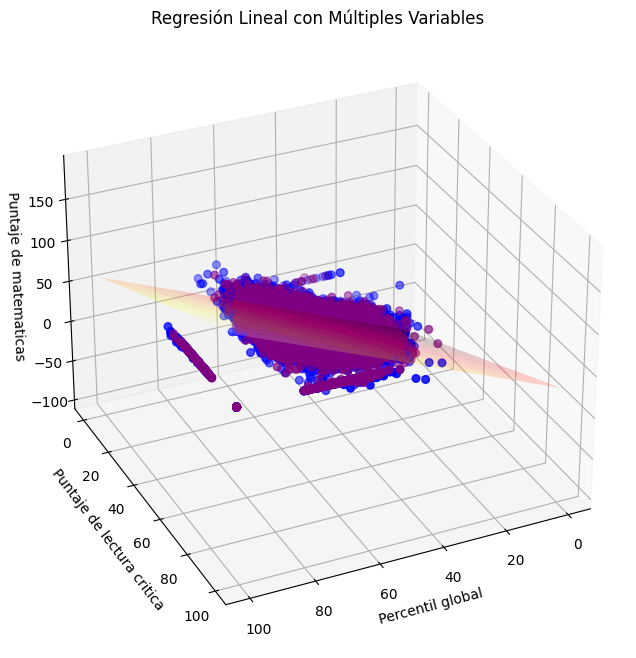

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(0, 100, num=10), np.linspace(0, 100, num=10))
nuevoX = (modelo.coef_[0] * xx)
nuevoY = (modelo.coef_[1] * yy)

x = (nuevoX + nuevoY + modelo.intercept_)
ax.plot_surface(xx, yy, x, alpha=0.2, cmap='hot')
ax.scatter(yz_train["PUNT_LECTURA_CRITICA"], yz_train["PUNT_MATEMATICAS"], x_train, c='blue',s=30)
ax.scatter(yz_test["PUNT_LECTURA_CRITICA"], yz_test["PUNT_MATEMATICAS"], x_test, c='purple',s=30)
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Percentil global')
ax.set_ylabel('Puntaje de lectura critica')
ax.set_zlabel('Puntaje de matematicas')
ax.set_title('Regresión Lineal con Múltiples Variables')

plt.show()

In [ ]:
import sklearn
from sklearn.linear_model import Ridge, RidgeCV

In [ ]:
help(sklearn.linear_model)

Help on package sklearn.linear_model in sklearn:

NAME
    sklearn.linear_model - The :mod:`sklearn.linear_model` module implements a variety of linear models.

PACKAGE CONTENTS
    _base
    _bayes
    _cd_fast
    _coordinate_descent
    _glm (package)
    _huber
    _least_angle
    _linear_loss
    _logistic
    _omp
    _passive_aggressive
    _perceptron
    _quantile
    _ransac
    _ridge
    _sag
    _sag_fast
    _sgd_fast
    _stochastic_gradient
    _theil_sen
    tests (package)

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.linear_model._huber.HuberRegressor(sklearn.linear_model._base.LinearModel, sklearn.base.RegressorMixin, sklearn.base.BaseEstimator)
        sklearn.linear_model._logistic.LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
            sklearn.linear_model._logistic.LogisticRegressionCV(sklearn.linear_model._logistic.LogisticRegression, skl